In [145]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure plots appear inline in the notebook
%matplotlib inline


SyntaxError: invalid syntax (4081785988.py, line 6)

In [117]:
# Adjust the file path if your CSV is located elsewhere
df = pd.read_csv("/Users/james.maulana/Projects/Hi Pages/data/hi_pages_clean.csv")

# Display the first few rows to verify it loaded correctly
df.head()

,time_of_post,latitude,longitude,category,number_of_tradies,estimated_size,number_of_impressions,accepted,hour_of_day,day_of_week,month,is_weekend
0,2019-09-10 00:01:06.000000 UTC,-37.8864,145.0756,8,8376,medium,275,0,0,2,9,False
1,2019-09-10 00:05:06.000000 UTC,-33.8586,151.3561,9,10000,medium,1323,0,0,2,9,False
2,2019-09-10 00:15:06.000000 UTC,-33.8141,151.0705,2,7331,small,859,0,0,2,9,False
3,2019-09-10 00:16:06.000000 UTC,-17.9496,122.0574,3,10000,small,832,0,0,2,9,False
4,2019-09-10 00:21:06.000000 UTC,-34.0679,151.1331,6,2476,small,907,0,0,2,9,False


In [119]:
size_mapping = {'small': 1, 'medium': 2, 'large': 3}
df['estimated_size_numeric'] = df['estimated_size'].str.lower().map(size_mapping)


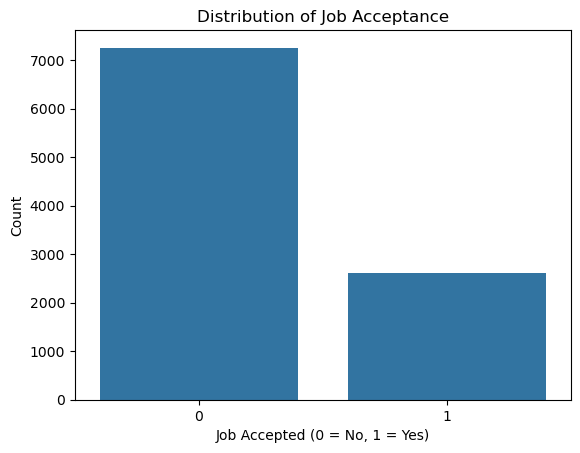

In [121]:
sns.countplot(data=df, x='accepted')
plt.title("Distribution of Job Acceptance")
plt.xlabel("Job Accepted (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


In [123]:
# If estimated_size is already numeric, use it directly. Otherwise, rename your mapped column to 'estimated_size_numeric'.
grouped = df.groupby('accepted')[['number_of_tradies', 'number_of_impressions', 'estimated_size_numeric']].mean().reset_index()
grouped


,accepted,number_of_tradies,number_of_impressions,estimated_size_numeric
0,0,3798.956606,1030.947789,1.421132
1,1,5395.163156,1032.171582,1.682497


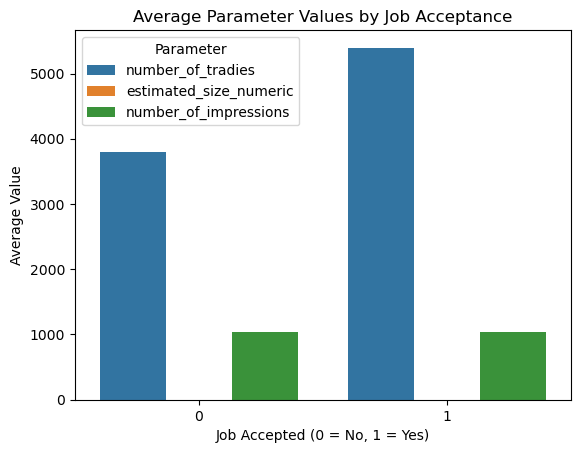

In [125]:
# Reshape the grouped data for easier plotting
grouped_melted = pd.melt(grouped, id_vars='accepted', 
                         value_vars=['number_of_tradies', 'estimated_size_numeric', 'number_of_impressions'],
                         var_name='Parameter', value_name='Average_Value')

# Create a grouped bar chart using seaborn
sns.barplot(data=grouped_melted, x='accepted', y='Average_Value', hue='Parameter')
plt.title("Average Parameter Values by Job Acceptance")
plt.xlabel("Job Accepted (0 = No, 1 = Yes)")
plt.ylabel("Average Value")
plt.legend(title="Parameter")
plt.show()


In [127]:
grouped_melted = pd.melt(
    grouped,
    id_vars='accepted',
    value_vars=['number_of_tradies', 'number_of_impressions', 'estimated_size_numeric'],
    var_name='Parameter',
    value_name='Average_Value'
)
grouped_melted


,accepted,Parameter,Average_Value
0,0,number_of_tradies,3798.956606
1,1,number_of_tradies,5395.163156
2,0,number_of_impressions,1030.947789
3,1,number_of_impressions,1032.171582
4,0,estimated_size_numeric,1.421132
5,1,estimated_size_numeric,1.682497


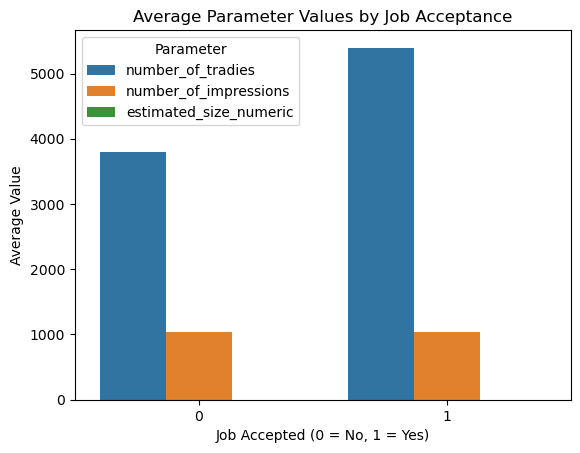

In [129]:
sns.barplot(data=grouped_melted, x='accepted', y='Average_Value', hue='Parameter')
plt.title("Average Parameter Values by Job Acceptance")
plt.xlabel("Job Accepted (0 = No, 1 = Yes)")
plt.ylabel("Average Value")
plt.legend(title="Parameter")
plt.show()

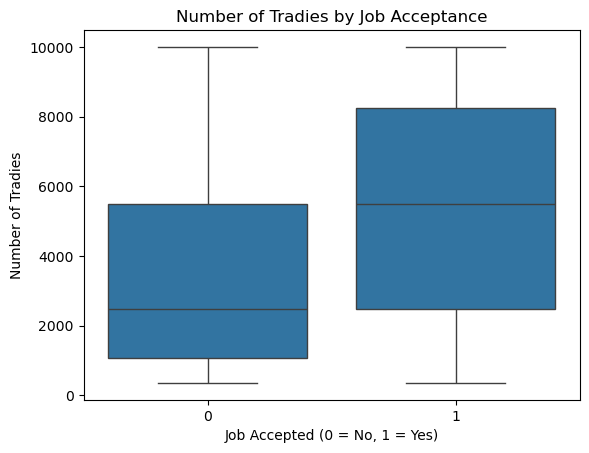

In [131]:
sns.boxplot(data=df, x='accepted', y='number_of_tradies')
plt.title("Number of Tradies by Job Acceptance")
plt.xlabel("Job Accepted (0 = No, 1 = Yes)")
plt.ylabel("Number of Tradies")
plt.show()


In [133]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Suppose these are your numeric features
features = ['number_of_tradies', 'estimated_size_numeric', 'number_of_impressions']
X = df[features]
y = df['accepted']


In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [137]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Evaluate accuracy
train_acc = model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)
print(f"Train Accuracy: {train_acc:.3f}")
print(f"Test Accuracy: {test_acc:.3f}")


Train Accuracy: 0.738
Test Accuracy: 0.767


In [139]:
coeffs = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_[0]
})
print(coeffs)


                  Feature  Coefficient
0       number_of_tradies     0.000179
1  estimated_size_numeric     1.102835
2   number_of_impressions    -0.000038


In [147]:
pip install statsmodels


Note: you may need to restart the kernel to use updated packages.


In [149]:
import statsmodels.api as sm

# Add a constant column for the intercept
X = df[features]
X = sm.add_constant(X)

y = df['accepted']  # 0 or 1


In [151]:
logit_model = sm.Logit(y, X)
result = logit_model.fit()
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.523285
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               accepted   No. Observations:                 9870
Model:                          Logit   Df Residuals:                     9866
Method:                           MLE   Df Model:                            3
Date:                Mon, 17 Feb 2025   Pseudo R-squ.:                 0.09427
Time:                        19:36:12   Log-Likelihood:                -5164.8
converged:                       True   LL-Null:                       -5702.4
Covariance Type:            nonrobust   LLR p-value:                8.908e-233
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -3.5860      0.109    -32.781      0.000      -3.800      

In [234]:
# 1. T-TEST EXAMPLE
df_accepted = df[df['accepted'] == 1]
df_not_accepted = df[df['accepted'] == 0]

stat, p = ttest_ind(df_accepted['number_of_tradies'], df_not_accepted['number_of_tradies'], nan_policy='omit')
print(f"T-test for number_of_tradies: p-value={p}")

# 2. LOGISTIC REGRESSION (Statsmodels) EXAMPLE
import statsmodels.api as sm

features = ['number_of_tradies', 'estimated_size_numeric', 'number_of_impressions']
X = df[features].copy()

# If 'estimated_size' is text, map it to numeric first

X = sm.add_constant(X)  # add intercept
y = df['accepted']

model = sm.Logit(y, X)
result = model.fit()
print(result.summary())


T-test for number_of_tradies: p-value=5.097799171854838e-122
Optimization terminated successfully.
         Current function value: 0.523285
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               accepted   No. Observations:                 9870
Model:                          Logit   Df Residuals:                     9866
Method:                           MLE   Df Model:                            3
Date:                Tue, 18 Feb 2025   Pseudo R-squ.:                 0.09427
Time:                        15:59:26   Log-Likelihood:                -5164.8
converged:                       True   LL-Null:                       -5702.4
Covariance Type:            nonrobust   LLR p-value:                8.908e-233
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  

Unique values in day_of_week: [2 3 4 5 6 7 1]
Unique values in hour_of_day: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]


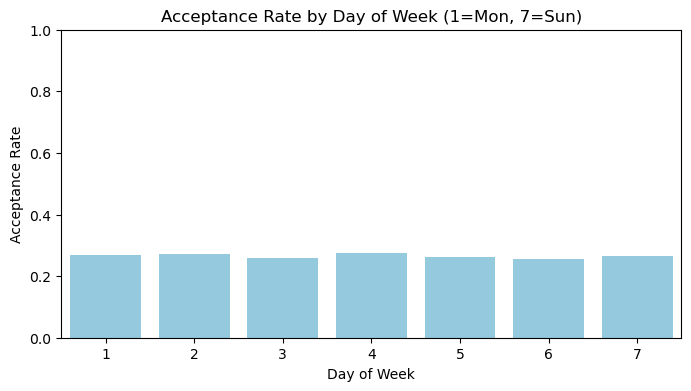

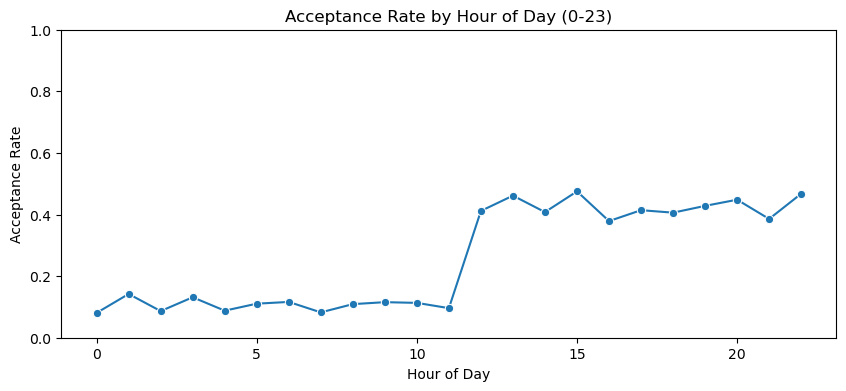

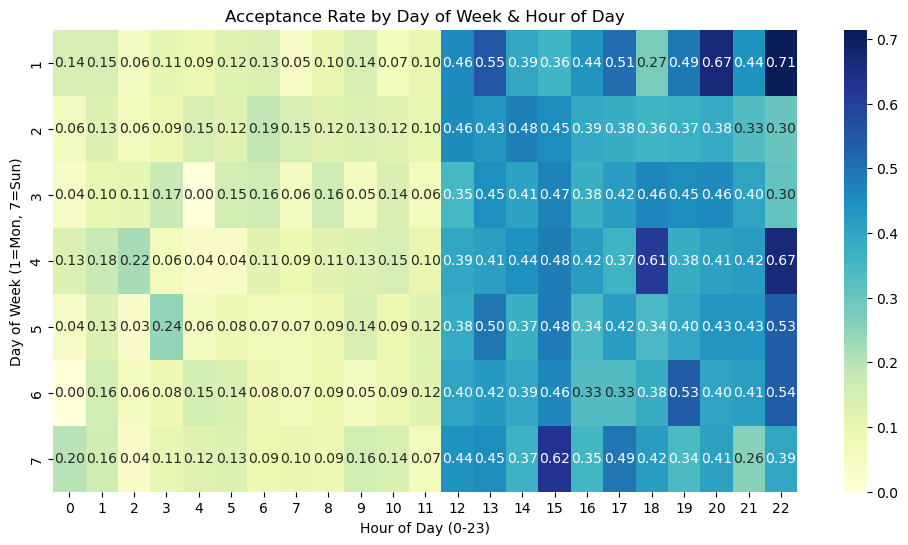

In [165]:
# 2. Confirm the columns exist and check their unique values
required_columns = ['day_of_week', 'hour_of_day', 'accepted']
missing_cols = [col for col in required_columns if col not in df.columns]
if missing_cols:
    raise ValueError(f"Missing required columns in CSV: {missing_cols}")

# Quick check of unique values (just to confirm data looks as expected)
print("Unique values in day_of_week:", df['day_of_week'].unique())
print("Unique values in hour_of_day:", df['hour_of_day'].unique())

# 3. Check that day_of_week is in the expected range (e.g., 1=Monday, 7=Sunday)
#    This is just a sanity check—if your CSV definitely has the correct range, you can skip this.
valid_day_range = df['day_of_week'].between(1, 7, inclusive='both')
if not valid_day_range.all():
    print("Warning: Some day_of_week values are outside the range 1–7. Please review the data.")
    
# Similarly, check hour_of_day is in 0–23
valid_hour_range = df['hour_of_day'].between(0, 23, inclusive='both')
if not valid_hour_range.all():
    print("Warning: Some hour_of_day values are outside the range 0–23. Please review the data.")

# 4. Calculate Acceptance Rate by Day of Week
day_grouped = (
    df.groupby('day_of_week')['accepted']
    .mean()
    .reset_index(name='acceptance_rate')
)

# 5. Calculate Acceptance Rate by Hour of Day
hour_grouped = (
    df.groupby('hour_of_day')['accepted']
    .mean()
    .reset_index(name='acceptance_rate')
)

# 6. Visualize Acceptance by Day of Week (Bar Chart)
plt.figure(figsize=(8, 4))
sns.barplot(data=day_grouped, x='day_of_week', y='acceptance_rate', color='skyblue')
plt.title("Acceptance Rate by Day of Week (1=Mon, 7=Sun)")
plt.xlabel("Day of Week")
plt.ylabel("Acceptance Rate")
plt.ylim(0, 1)
plt.show()

# 7. Visualize Acceptance by Hour of Day (Line Chart)
plt.figure(figsize=(10, 4))
sns.lineplot(data=hour_grouped, x='hour_of_day', y='acceptance_rate', marker='o')
plt.title("Acceptance Rate by Hour of Day (0-23)")
plt.xlabel("Hour of Day")
plt.ylabel("Acceptance Rate")
plt.ylim(0, 1)
plt.show()

# 8. (Optional) Create a Heatmap for Day of Week vs. Hour of Day
pivot_data = df.pivot_table(
    index='day_of_week',
    columns='hour_of_day',
    values='accepted',
    aggfunc='mean'
)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_data, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Acceptance Rate by Day of Week & Hour of Day")
plt.xlabel("Hour of Day (0-23)")
plt.ylabel("Day of Week (1=Mon, 7=Sun)")
plt.show()

# Interpretation:
# - The bar chart shows acceptance across days (1–7).
# - The line chart shows acceptance trends over the 24-hour cycle.
# - The heatmap reveals the intersection of day & hour patterns.

Optimization terminated successfully.
         Current function value: 0.523285
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               accepted   No. Observations:                 9870
Model:                          Logit   Df Residuals:                     9866
Method:                           MLE   Df Model:                            3
Date:                Mon, 17 Feb 2025   Pseudo R-squ.:                 0.09427
Time:                        20:10:50   Log-Likelihood:                -5164.8
converged:                       True   LL-Null:                       -5702.4
Covariance Type:            nonrobust   LLR p-value:                8.908e-233
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -3.5860      0.109    -32.781      0.000      -3.800      

Unique values in day_of_week: [2 3 4 5 6 7 1]
Unique values in hour_of_day: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]


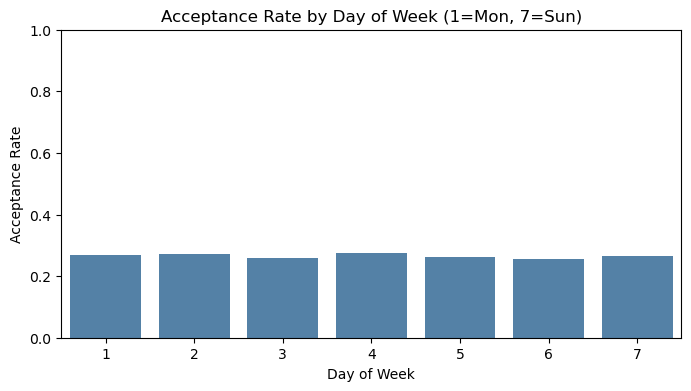

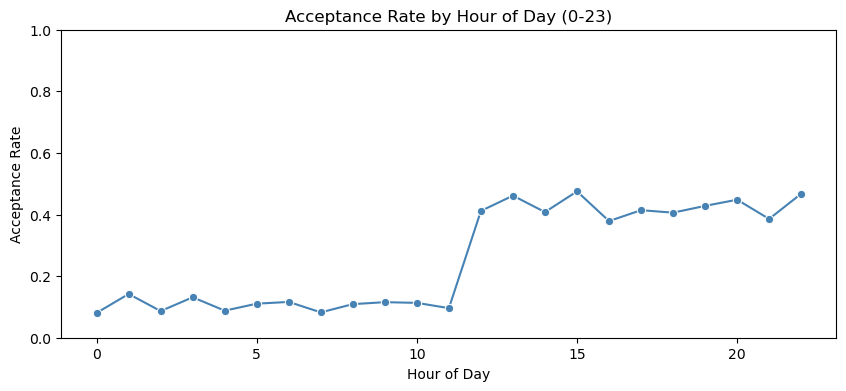

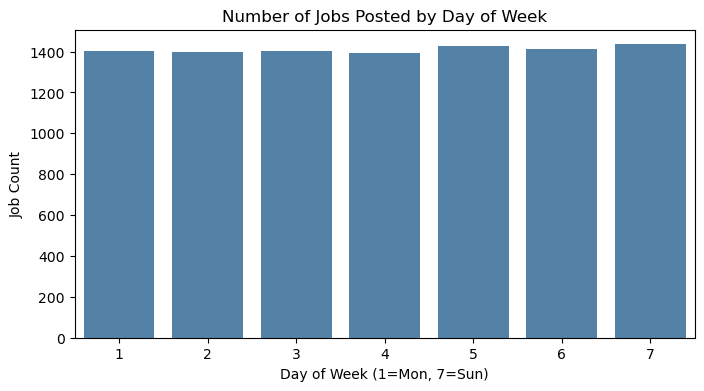

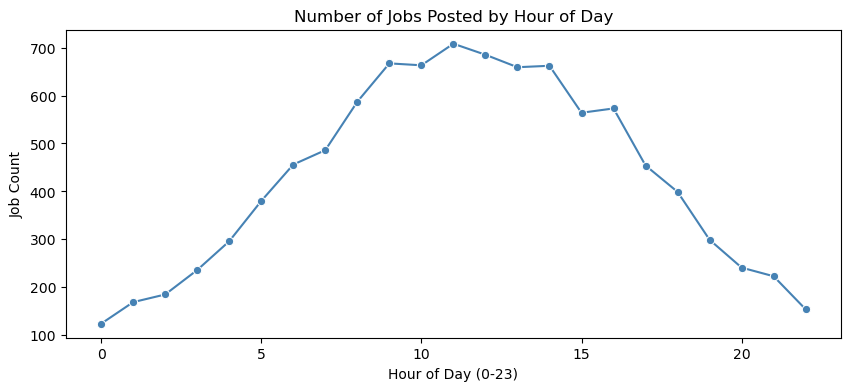

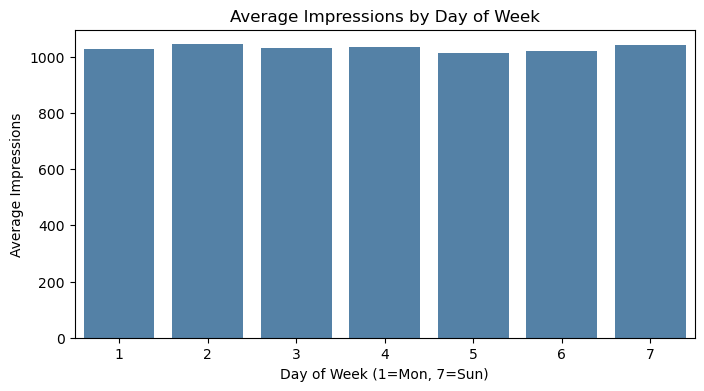

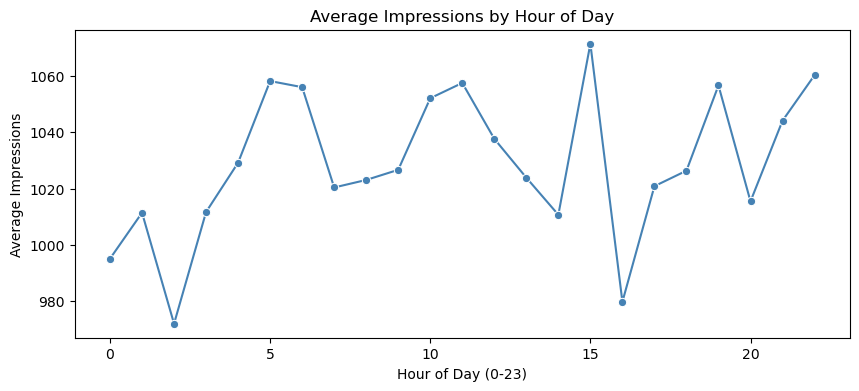

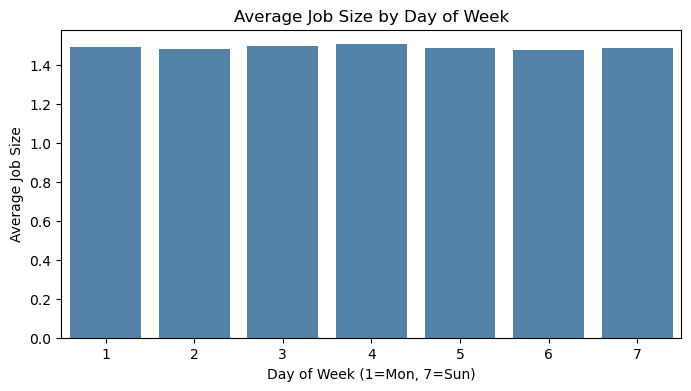

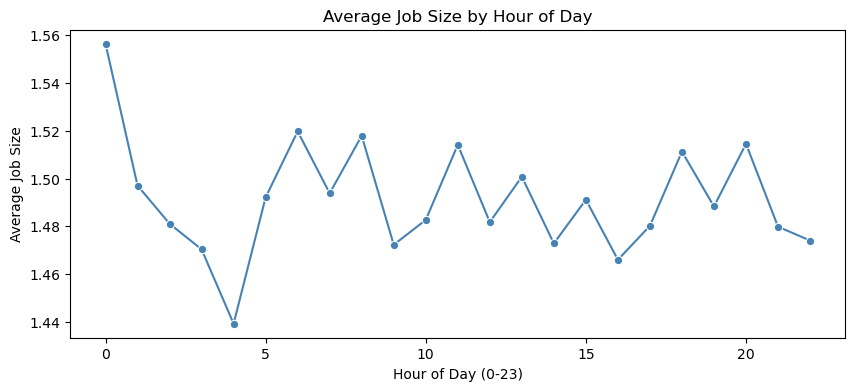

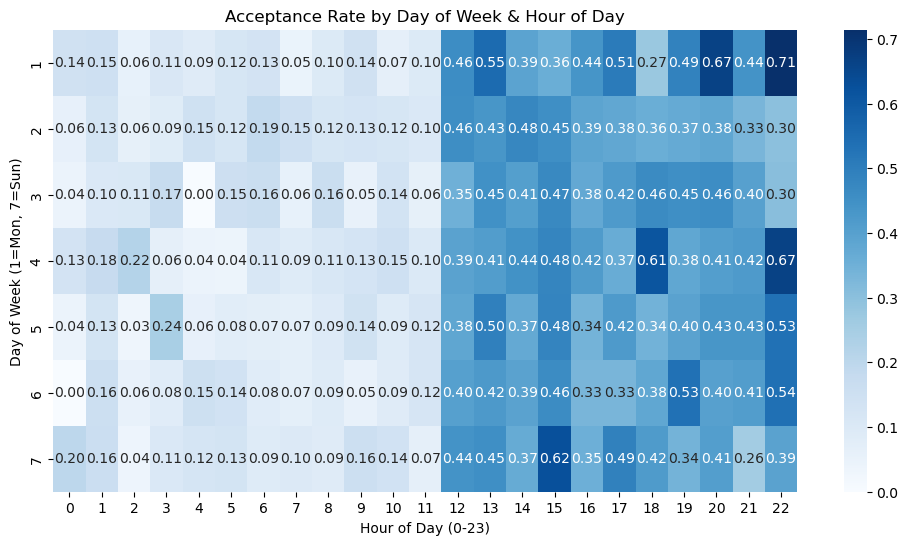

In [171]:
# 2. Confirm required columns exist
required_columns = ['day_of_week', 'hour_of_day', 'accepted', 
                    'number_of_impressions', 'estimated_size_numeric']
for col in required_columns:
    if col not in df.columns:
        raise ValueError(f"Missing required column: {col}")

# (Optional) Print unique values for sanity check
print("Unique values in day_of_week:", df['day_of_week'].unique())
print("Unique values in hour_of_day:", df['hour_of_day'].unique())

# 3. Visualize Acceptance by Day of Week (Bar Chart)
day_grouped = df.groupby('day_of_week')['accepted'].mean().reset_index(name='acceptance_rate')
plt.figure(figsize=(8, 4))
sns.barplot(data=day_grouped, x='day_of_week', y='acceptance_rate', color='steelblue')
plt.title("Acceptance Rate by Day of Week (1=Mon, 7=Sun)")
plt.xlabel("Day of Week")
plt.ylabel("Acceptance Rate")
plt.ylim(0, 1)
plt.show()

# 4. Visualize Acceptance by Hour of Day (Line Plot)
hour_grouped = df.groupby('hour_of_day')['accepted'].mean().reset_index(name='acceptance_rate')
plt.figure(figsize=(10, 4))
sns.lineplot(data=hour_grouped, x='hour_of_day', y='acceptance_rate', marker='o', color='steelblue')
plt.title("Acceptance Rate by Hour of Day (0-23)")
plt.xlabel("Hour of Day")
plt.ylabel("Acceptance Rate")
plt.ylim(0, 1)
plt.show()

# 5. Visualize Number of Jobs Posted by Day of Week (Bar Chart)
jobs_by_day = df.groupby('day_of_week').size().reset_index(name='job_count')
plt.figure(figsize=(8, 4))
sns.barplot(data=jobs_by_day, x='day_of_week', y='job_count', color='steelblue')
plt.title("Number of Jobs Posted by Day of Week")
plt.xlabel("Day of Week (1=Mon, 7=Sun)")
plt.ylabel("Job Count")
plt.show()

# 6. Visualize Number of Jobs Posted by Hour of Day (Line Plot)
jobs_by_hour = df.groupby('hour_of_day').size().reset_index(name='job_count')
plt.figure(figsize=(10, 4))
sns.lineplot(data=jobs_by_hour, x='hour_of_day', y='job_count', marker='o', color='steelblue')
plt.title("Number of Jobs Posted by Hour of Day")
plt.xlabel("Hour of Day (0-23)")
plt.ylabel("Job Count")
plt.show()

# 7. Visualize Average Impressions by Day of Week (Bar Chart)
impressions_by_day = df.groupby('day_of_week')['number_of_impressions'].mean().reset_index(name='avg_impressions')
plt.figure(figsize=(8, 4))
sns.barplot(data=impressions_by_day, x='day_of_week', y='avg_impressions', color='steelblue')
plt.title("Average Impressions by Day of Week")
plt.xlabel("Day of Week (1=Mon, 7=Sun)")
plt.ylabel("Average Impressions")
plt.show()

# 8. Visualize Average Impressions by Hour of Day (Line Plot)
impressions_by_hour = df.groupby('hour_of_day')['number_of_impressions'].mean().reset_index(name='avg_impressions')
plt.figure(figsize=(10, 4))
sns.lineplot(data=impressions_by_hour, x='hour_of_day', y='avg_impressions', marker='o', color='steelblue')
plt.title("Average Impressions by Hour of Day")
plt.xlabel("Hour of Day (0-23)")
plt.ylabel("Average Impressions")
plt.show()

# 9. Visualize Average Job Size by Day of Week (Bar Chart)
jobsize_by_day = df.groupby('day_of_week')['estimated_size_numeric'].mean().reset_index(name='avg_job_size')
plt.figure(figsize=(8, 4))
sns.barplot(data=jobsize_by_day, x='day_of_week', y='avg_job_size', color='steelblue')
plt.title("Average Job Size by Day of Week")
plt.xlabel("Day of Week (1=Mon, 7=Sun)")
plt.ylabel("Average Job Size")
plt.show()

# 10. Visualize Average Job Size by Hour of Day (Line Plot)
jobsize_by_hour = df.groupby('hour_of_day')['estimated_size_numeric'].mean().reset_index(name='avg_job_size')
plt.figure(figsize=(10, 4))
sns.lineplot(data=jobsize_by_hour, x='hour_of_day', y='avg_job_size', marker='o', color='steelblue')
plt.title("Average Job Size by Hour of Day")
plt.xlabel("Hour of Day (0-23)")
plt.ylabel("Average Job Size")
plt.show()

# 11. Create a Heatmap for Acceptance Rate (Day vs. Hour)
pivot_data = df.pivot_table(
    index='day_of_week',
    columns='hour_of_day',
    values='accepted',
    aggfunc='mean'
)
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_data, annot=True, cmap='Blues', fmt=".2f")
plt.title("Acceptance Rate by Day of Week & Hour of Day")
plt.xlabel("Hour of Day (0-23)")
plt.ylabel("Day of Week (1=Mon, 7=Sun)")
plt.show()


Unique values in day_of_week: [2 3 4 5 6 7 1]
Unique values in hour_of_day: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]


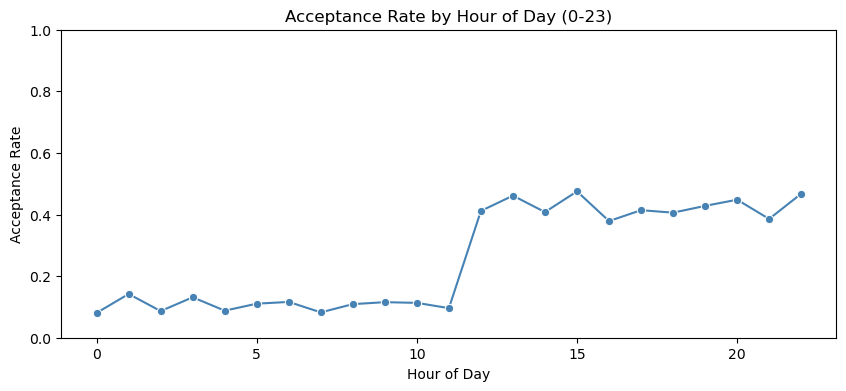

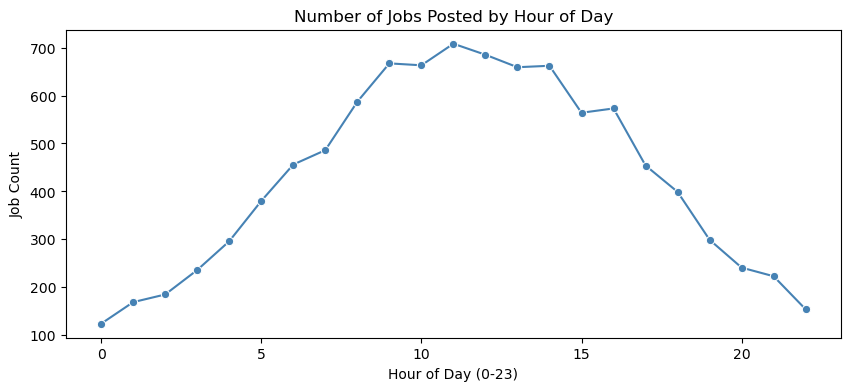

In [183]:
# 2. Confirm required columns exist
required_columns = ['day_of_week', 'hour_of_day', 'accepted', 
                    'number_of_impressions', 'estimated_size_numeric']
for col in required_columns:
    if col not in df.columns:
        raise ValueError(f"Missing required column: {col}")

# (Optional) Print unique values for sanity check
print("Unique values in day_of_week:", df['day_of_week'].unique())
print("Unique values in hour_of_day:", df['hour_of_day'].unique())

# 4. Visualize Acceptance by Hour of Day (Line Plot)
hour_grouped = df.groupby('hour_of_day')['accepted'].mean().reset_index(name='acceptance_rate')
plt.figure(figsize=(10, 4))
sns.lineplot(data=hour_grouped, x='hour_of_day', y='acceptance_rate', marker='o', color='steelblue')
plt.title("Acceptance Rate by Hour of Day (0-23)")
plt.xlabel("Hour of Day")
plt.ylabel("Acceptance Rate")
plt.ylim(0, 1)
plt.show()


# 6. Visualize Number of Jobs Posted by Hour of Day (Line Plot)
jobs_by_hour = df.groupby('hour_of_day').size().reset_index(name='job_count')
plt.figure(figsize=(10, 4))
sns.lineplot(data=jobs_by_hour, x='hour_of_day', y='job_count', marker='o', color='steelblue')
plt.title("Number of Jobs Posted by Hour of Day")
plt.xlabel("Hour of Day (0-23)")
plt.ylabel("Job Count")
plt.show()


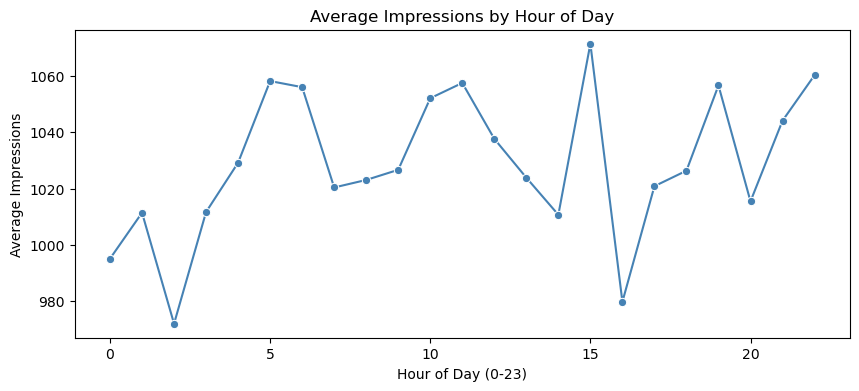

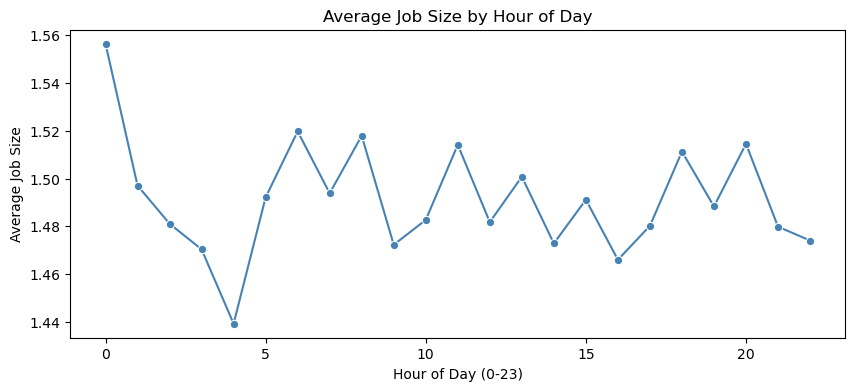

In [181]:

# 8. Visualize Average Impressions by Hour of Day (Line Plot)
impressions_by_hour = df.groupby('hour_of_day')['number_of_impressions'].mean().reset_index(name='avg_impressions')
plt.figure(figsize=(10, 4))
sns.lineplot(data=impressions_by_hour, x='hour_of_day', y='avg_impressions', marker='o', color='steelblue')
plt.title("Average Impressions by Hour of Day")
plt.xlabel("Hour of Day (0-23)")
plt.ylabel("Average Impressions")
plt.show()

# 10. Visualize Average Job Size by Hour of Day (Line Plot)
jobsize_by_hour = df.groupby('hour_of_day')['estimated_size_numeric'].mean().reset_index(name='avg_job_size')
plt.figure(figsize=(10, 4))
sns.lineplot(data=jobsize_by_hour, x='hour_of_day', y='avg_job_size', marker='o', color='steelblue')
plt.title("Average Job Size by Hour of Day")
plt.xlabel("Hour of Day (0-23)")
plt.ylabel("Average Job Size")
plt.show()


Unique values in day_of_week: [2 3 4 5 6 7 1]
Unique values in hour_of_day: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]


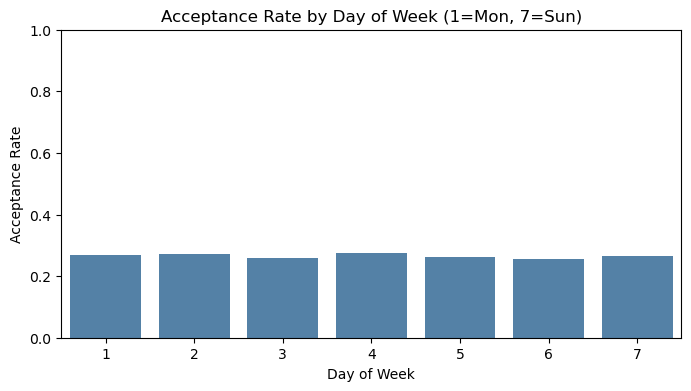

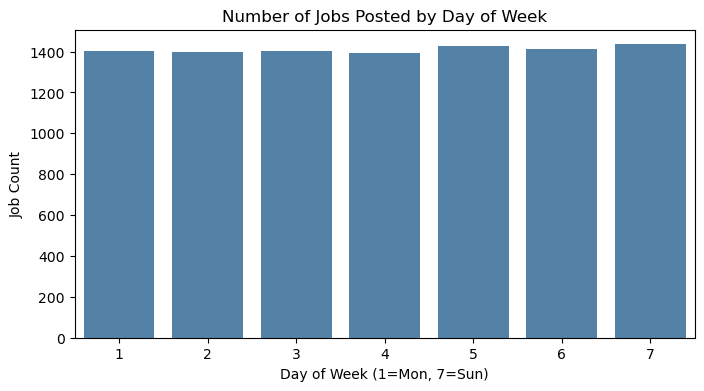

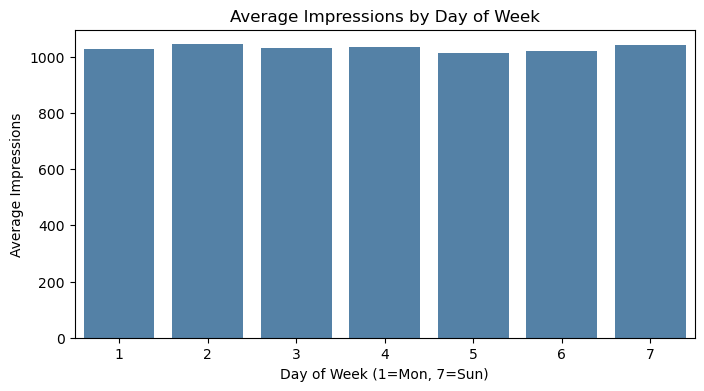

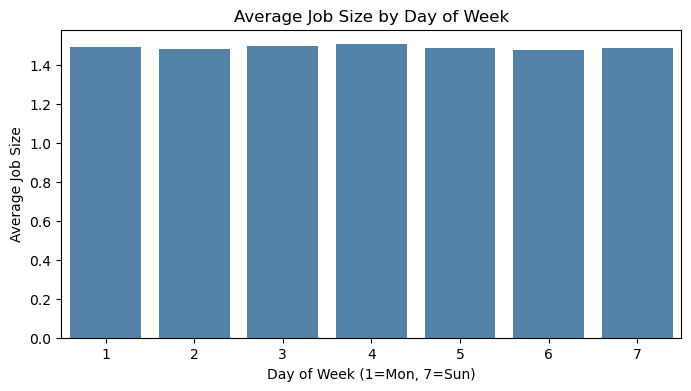

In [185]:
# 2. Confirm required columns exist
required_columns = ['day_of_week', 'hour_of_day', 'accepted', 
                    'number_of_impressions', 'estimated_size_numeric']
for col in required_columns:
    if col not in df.columns:
        raise ValueError(f"Missing required column: {col}")

# (Optional) Print unique values for sanity check
print("Unique values in day_of_week:", df['day_of_week'].unique())
print("Unique values in hour_of_day:", df['hour_of_day'].unique())

# 3. Visualize Acceptance by Day of Week (Bar Chart)
day_grouped = df.groupby('day_of_week')['accepted'].mean().reset_index(name='acceptance_rate')
plt.figure(figsize=(8, 4))
sns.barplot(data=day_grouped, x='day_of_week', y='acceptance_rate', color='steelblue')
plt.title("Acceptance Rate by Day of Week (1=Mon, 7=Sun)")
plt.xlabel("Day of Week")
plt.ylabel("Acceptance Rate")
plt.ylim(0, 1)
plt.show()

# 5. Visualize Number of Jobs Posted by Day of Week (Bar Chart)
jobs_by_day = df.groupby('day_of_week').size().reset_index(name='job_count')
plt.figure(figsize=(8, 4))
sns.barplot(data=jobs_by_day, x='day_of_week', y='job_count', color='steelblue')
plt.title("Number of Jobs Posted by Day of Week")
plt.xlabel("Day of Week (1=Mon, 7=Sun)")
plt.ylabel("Job Count")
plt.show()

# 7. Visualize Average Impressions by Day of Week (Bar Chart)
impressions_by_day = df.groupby('day_of_week')['number_of_impressions'].mean().reset_index(name='avg_impressions')
plt.figure(figsize=(8, 4))
sns.barplot(data=impressions_by_day, x='day_of_week', y='avg_impressions', color='steelblue')
plt.title("Average Impressions by Day of Week")
plt.xlabel("Day of Week (1=Mon, 7=Sun)")
plt.ylabel("Average Impressions")
plt.show()

# 9. Visualize Average Job Size by Day of Week (Bar Chart)
jobsize_by_day = df.groupby('day_of_week')['estimated_size_numeric'].mean().reset_index(name='avg_job_size')
plt.figure(figsize=(8, 4))
sns.barplot(data=jobsize_by_day, x='day_of_week', y='avg_job_size', color='steelblue')
plt.title("Average Job Size by Day of Week")
plt.xlabel("Day of Week (1=Mon, 7=Sun)")
plt.ylabel("Average Job Size")
plt.show()

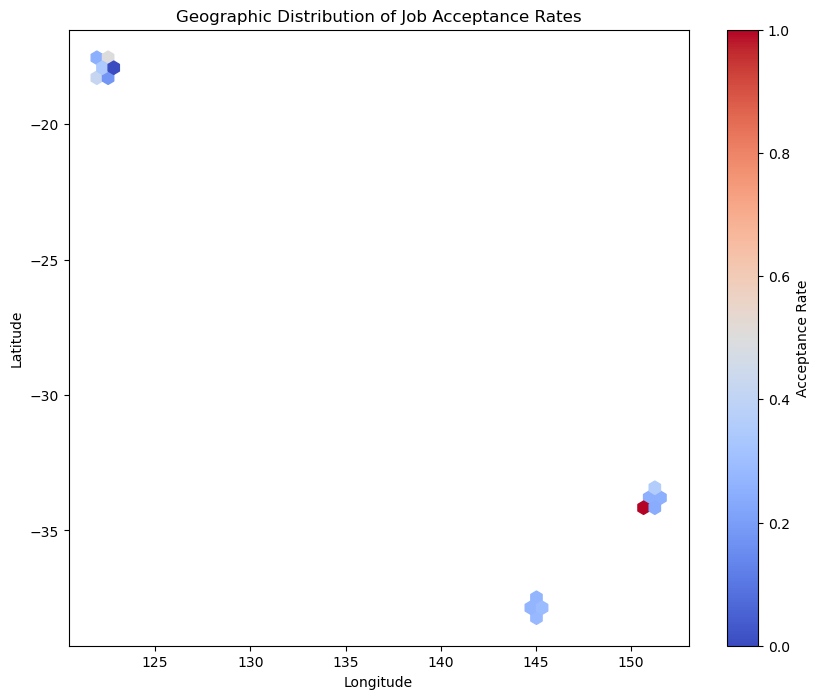

In [187]:
# 2. Verify that required columns exist: latitude, longitude, and accepted
required_columns = ['latitude', 'longitude', 'accepted']
for col in required_columns:
    if col not in df.columns:
        raise ValueError(f"Missing required column: {col}")

# 3. Drop rows with missing coordinates
df = df.dropna(subset=['latitude', 'longitude'])

# 4. (Optional) Convert accepted to numeric if not already (0/1)
df['accepted'] = pd.to_numeric(df['accepted'], errors='coerce')

# 5. Create a hexbin plot to aggregate acceptance rates by geographic area.
#    The 'C' parameter uses the accepted values and 'reduce_C_function' computes their mean.
plt.figure(figsize=(10, 8))
hb = plt.hexbin(
    df['longitude'], 
    df['latitude'], 
    C=df['accepted'], 
    gridsize=50,             # Adjust gridsize for resolution
    reduce_C_function=np.mean, 
    cmap='coolwarm', 
    mincnt=1                # Only color bins with at least 1 point
)
cb = plt.colorbar(hb)
cb.set_label("Acceptance Rate")
plt.title("Geographic Distribution of Job Acceptance Rates")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

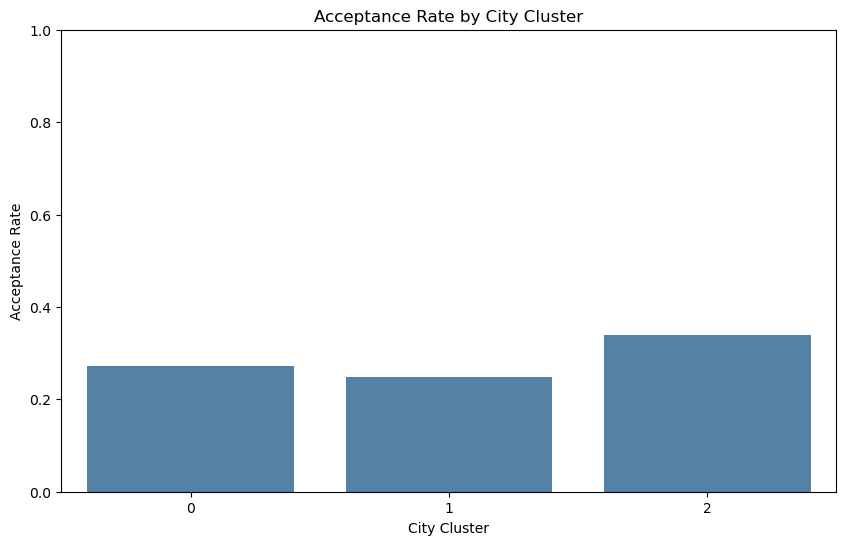

Acceptance metrics by city cluster:
   city_cluster  job_count  acceptance_rate
0             0       4422         0.272275
1             1       4772         0.247695
2             2        609         0.339901
ANOVA F-statistic: 13.080205998187632
ANOVA p-value: 2.122791352706383e-06


In [196]:
from sklearn.cluster import DBSCAN
from scipy.stats import f_oneway

# 2. Verify required columns exist: latitude, longitude, accepted
for col in ['latitude', 'longitude', 'accepted']:
    if col not in df.columns:
        raise ValueError(f"Missing required column: {col}")

# 3. Drop rows with missing coordinates
df = df.dropna(subset=['latitude', 'longitude'])

# 4. Ensure 'accepted' is numeric (0 or 1)
df['accepted'] = pd.to_numeric(df['accepted'], errors='coerce')

# 5. Cluster jobs by geographic coordinates using DBSCAN
#    eps: maximum distance between two samples for them to be considered as in the same neighborhood.
#    min_samples: minimum number of points to form a dense region.
# Adjust eps (e.g., 0.05) and min_samples (e.g., 10) as needed.
coords = df[['latitude', 'longitude']].values
db = DBSCAN(eps=0.05, min_samples=10, metric='euclidean').fit(coords)
df['city_cluster'] = db.labels_  # -1 indicates noise

# Filter out noise points (optional)
clusters = df[df['city_cluster'] != -1].copy()

#6. Visualize acceptance rate by city cluster using a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped, x='city_cluster', y='acceptance_rate', color='steelblue')
plt.title("Acceptance Rate by City Cluster")
plt.xlabel("City Cluster")
plt.ylabel("Acceptance Rate")
plt.ylim(0, 1)
plt.show()

# 7. Group by city cluster and calculate acceptance metrics
grouped = clusters.groupby('city_cluster').agg(
    job_count=('accepted', 'count'),
    acceptance_rate=('accepted', 'mean')
).reset_index()

print("Acceptance metrics by city cluster:")
print(grouped)

# 8. Statistical Testing: Use one-way ANOVA to compare acceptance rates among clusters
# Prepare a list of acceptance arrays for each cluster
cluster_acceptance = [clusters[clusters['city_cluster'] == cluster]['accepted'].dropna().values 
                      for cluster in clusters['city_cluster'].unique() if cluster != -1]

anova_stat, p_value = f_oneway(*cluster_acceptance)
print("ANOVA F-statistic:", anova_stat)
print("ANOVA p-value:", p_value)

# Interpretation:
# - A p-value < 0.05 suggests that acceptance rates differ significantly among the clusters.

Acceptance metrics by city cluster (before naming):
   city_cluster  job_count  acceptance_rate  centroid_latitude  \
0             0       4422         0.272275         -37.812006   
1             1       4772         0.247695         -33.872145   
2             2        609         0.339901         -17.963800   

   centroid_longitude  
0          144.959031  
1          151.209549  
2          122.233999  

Acceptance metrics by city cluster (with city names):
   city_cluster  job_count  acceptance_rate  centroid_latitude  \
0             0       4422         0.272275         -37.812006   
1             1       4772         0.247695         -33.872145   
2             2        609         0.339901         -17.963800   

   centroid_longitude       city  
0          144.959031  Melbourne  
1          151.209549     Sydney  
2          122.233999     Darwin  


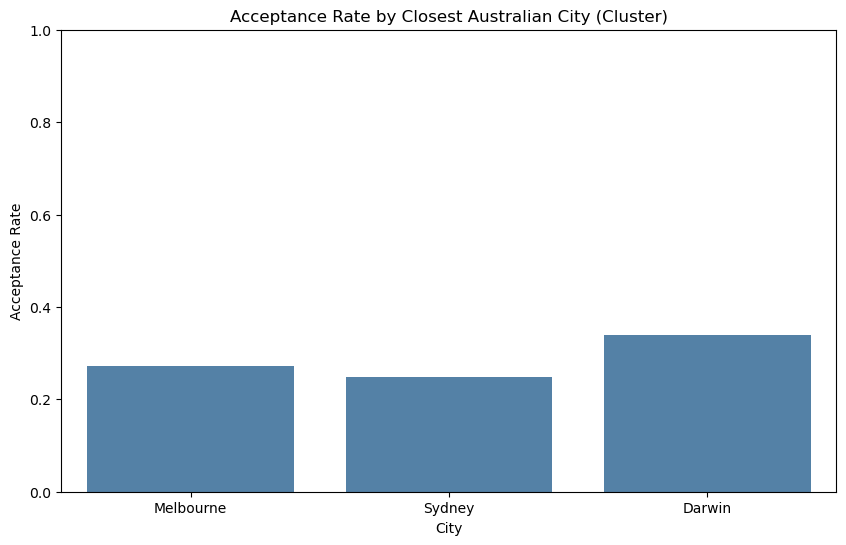

ANOVA F-statistic: 13.080205998187632
ANOVA p-value: 2.122791352706383e-06


In [200]:
import math

# Verify required columns exist: latitude, longitude, accepted
for col in ['latitude', 'longitude', 'accepted']:
    if col not in df.columns:
        raise ValueError(f"Missing required column: {col}")

# Drop rows with missing coordinates
df = df.dropna(subset=['latitude', 'longitude'])

# Ensure 'accepted' is numeric (0 or 1)
df['accepted'] = pd.to_numeric(df['accepted'], errors='coerce')

# --- Step 2: Cluster Jobs by Geographic Coordinates ---
# Extract coordinates (using latitude and longitude)
coords = df[['latitude', 'longitude']].values

# Use DBSCAN to cluster the jobs. Adjust eps and min_samples as needed.
db = DBSCAN(eps=0.05, min_samples=10, metric='euclidean').fit(coords)
df['city_cluster'] = db.labels_  # Note: -1 indicates noise

# Filter out noise points (optional)
clusters = df[df['city_cluster'] != -1].copy()

# --- Step 3: Calculate Cluster Acceptance Metrics ---
grouped = clusters.groupby('city_cluster').agg(
    job_count=('accepted', 'count'),
    acceptance_rate=('accepted', 'mean'),
    centroid_latitude=('latitude', 'mean'),
    centroid_longitude=('longitude', 'mean')
).reset_index()

print("Acceptance metrics by city cluster (before naming):")
print(grouped)

# --- Step 4: Define Known Australian Cities ---
# Coordinates are (latitude, longitude)
australian_cities = {
    'Sydney': (-33.8688, 151.2093),
    'Melbourne': (-37.8136, 144.9631),
    'Brisbane': (-27.4698, 153.0251),
    'Perth': (-31.9505, 115.8605),
    'Adelaide': (-34.9285, 138.6007),
    'Canberra': (-35.2809, 149.1300),
    'Hobart': (-42.8821, 147.3272),
    'Darwin': (-12.4634, 130.8456)
}

# --- Step 5: Define the Haversine Distance Function ---
def haversine(lat1, lon1, lat2, lon2):
    # Convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(math.radians, [lon1, lat1, lon2, lat2])
    # Haversine formula
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a)) 
    # Radius of Earth in kilometers (approx)
    km = 6371 * c
    return km

# --- Step 6: Assign a City Name to Each Cluster ---
def assign_city(centroid_lat, centroid_lon, cities):
    min_dist = float('inf')
    closest_city = None
    for city, (city_lat, city_lon) in cities.items():
        dist = haversine(centroid_lat, centroid_lon, city_lat, city_lon)
        if dist < min_dist:
            min_dist = dist
            closest_city = city
    return closest_city

# Apply the function to assign a city to each cluster based on the centroid coordinates
grouped['city'] = grouped.apply(lambda row: assign_city(row['centroid_latitude'], row['centroid_longitude'], australian_cities), axis=1)

print("\nAcceptance metrics by city cluster (with city names):")
print(grouped)

# --- Step 7: Visualize Acceptance Rates by City ---
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped, x='city', y='acceptance_rate', color='steelblue')
plt.title("Acceptance Rate by Closest Australian City (Cluster)")
plt.xlabel("City")
plt.ylabel("Acceptance Rate")
plt.ylim(0, 1)
plt.show()

# --- Step 8: Statistical Testing ---
# Prepare a list of acceptance arrays for each cluster (ignoring noise)
cluster_acceptance = [clusters[clusters['city_cluster'] == cluster]['accepted'].dropna().values 
                      for cluster in clusters['city_cluster'].unique() if cluster != -1]

anova_stat, p_value = f_oneway(*cluster_acceptance)
print("ANOVA F-statistic:", anova_stat)
print("ANOVA p-value:", p_value)

# Interpretation:
# A p-value < 0.05 suggests that acceptance rates differ significantly among the clusters (cities).


In [218]:
import pandas as pd
import numpy as np
import math
from sklearn.cluster import DBSCAN
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------
# Step 1: Load Data and Verify Columns
# ----------------------------
df = pd.read_csv("/Users/james.maulana/Projects/Hi Pages/data/hi_pages_clean.csv")

# Verify required columns exist
required_cols = ['latitude', 'longitude', 'accepted', 'number_of_impressions', 'estimated_size']
for col in required_cols:
    if col not in df.columns:
        raise ValueError(f"Missing required column: {col}")

# Drop rows with missing coordinates
df = df.dropna(subset=['latitude', 'longitude'])

# Convert 'accepted' and 'number_of_impressions' to numeric
df['accepted'] = pd.to_numeric(df['accepted'], errors='coerce')
df['number_of_impressions'] = pd.to_numeric(df['number_of_impressions'], errors='coerce')

# ----------------------------
# Step 2: Cluster Jobs by Geographic Coordinates using DBSCAN
# ----------------------------
coords = df[['latitude', 'longitude']].values
db = DBSCAN(eps=0.05, min_samples=10, metric='euclidean').fit(coords)
df['city_cluster'] = db.labels_  # -1 indicates noise

# Filter out noise points for clustering metrics
clusters = df[df['city_cluster'] != -1].copy()

# ----------------------------
# Step 3: Calculate Cluster Metrics and Assign City Names
# ----------------------------
# Group by cluster to get cluster-level metrics including centroid coordinates
grouped = clusters.groupby('city_cluster').agg(
    job_count=('accepted', 'count'),
    acceptance_rate=('accepted', 'mean'),
    centroid_latitude=('latitude', 'mean'),
    centroid_longitude=('longitude', 'mean')
).reset_index()

print("Cluster metrics before city assignment:")
print(grouped)

# Define major Australian cities with approximate coordinates (latitude, longitude)
australian_cities = {
    'Sydney': (-33.8688, 151.2093),
    'Melbourne': (-37.8136, 144.9631),
    'Brisbane': (-27.4698, 153.0251),
    'Perth': (-31.9505, 115.8605),
    'Adelaide': (-34.9285, 138.6007),
    'Canberra': (-35.2809, 149.1300),
    'Hobart': (-42.8821, 147.3272),
    'Darwin': (-12.4634, 130.8456)
}

# Define the haversine distance function (in kilometers)
def haversine(lat1, lon1, lat2, lon2):
    # Convert degrees to radians
    lon1, lat1, lon2, lat2 = map(math.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a))
    km = 6371 * c
    return km

# Function to assign a city based on closest Australian city
def assign_city(centroid_lat, centroid_lon, cities):
    min_dist = float('inf')
    closest_city = None
    for city, (city_lat, city_lon) in cities.items():
        dist = haversine(centroid_lat, centroid_lon, city_lat, city_lon)
        if dist < min_dist:
            min_dist = dist
            closest_city = city
    return closest_city

# Assign a city to each cluster
grouped['city'] = grouped.apply(lambda row: assign_city(row['centroid_latitude'], row['centroid_longitude'], australian_cities), axis=1)

print("\nCluster metrics with assigned city names:")
print(grouped)

# ----------------------------
# Step 4: Merge City Names Back into Main DataFrame
# ----------------------------
# Merge on the city_cluster column to add a 'city' column to df
df = df.merge(grouped[['city_cluster', 'city']], on='city_cluster', how='left')

# Check if the merge was successful
if 'city' not in df.columns:
    raise KeyError("City column not found after merge. Check the merge keys and grouped data.")

# ----------------------------
# Step 5: Convert Estimated Job Size to Numeric
# ----------------------------
# If estimated_size is textual (e.g., 'small', 'medium', 'large'), map these to numbers.
if df['estimated_size'].dtype == object:
    size_mapping = {'small': 1, 'medium': 2, 'large': 3}
    df['estimated_size_numeric'] = df['estimated_size'].str.lower().map(size_mapping)
else:
    df['estimated_size_numeric'] = pd.to_numeric(df['estimated_size'], errors='coerce')

# ----------------------------
# Step 6: Compute Overall Statistics per Region (City)
# ----------------------------
region_stats = df.groupby('city').agg(
    total_jobs=('accepted', 'count'),
    acceptance_rate=('accepted', 'mean'),
    avg_impressions=('number_of_impressions', 'mean'),
    avg_job_size=('estimated_size_numeric', 'mean')
).reset_index()

print("\nOverall Region Statistics:")
print(region_stats)


Cluster metrics before city assignment:
   city_cluster  job_count  acceptance_rate  centroid_latitude  \
0             0       4422         0.272275         -37.812006   
1             1       4772         0.247695         -33.872145   
2             2        609         0.339901         -17.963800   

   centroid_longitude  
0          144.959031  
1          151.209549  
2          122.233999  

Cluster metrics with assigned city names:
   city_cluster  job_count  acceptance_rate  centroid_latitude  \
0             0       4422         0.272275         -37.812006   
1             1       4772         0.247695         -33.872145   
2             2        609         0.339901         -17.963800   

   centroid_longitude       city  
0          144.959031  Melbourne  
1          151.209549     Sydney  
2          122.233999     Darwin  

Overall Region Statistics:
        city  total_jobs  acceptance_rate  avg_impressions  avg_job_size
0     Darwin         609         0.339901      102

Overall Statistics by Category:
   category  total_jobs  acceptance_rate  avg_impressions  avg_job_size
0         1         285         0.270175      1017.094737      1.505263
1         2         834         0.238609      1043.443645      1.477218
2         3        1358         0.393962      1022.301178      1.503682
3         4        1924         0.261954      1023.882536      1.494802
4         5        1943         0.159032      1028.928461      1.478127
5         6        1581         0.301075      1039.497154      1.499684
6         7        1121         0.262266      1037.772525      1.477252
7         8         614         0.252443      1033.112378      1.478827
8         9         210         0.295238      1047.542857      1.538095


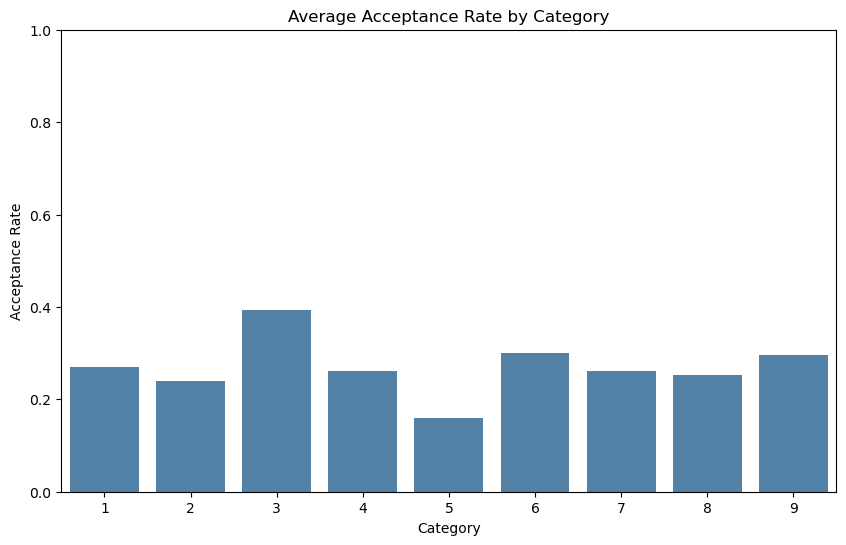

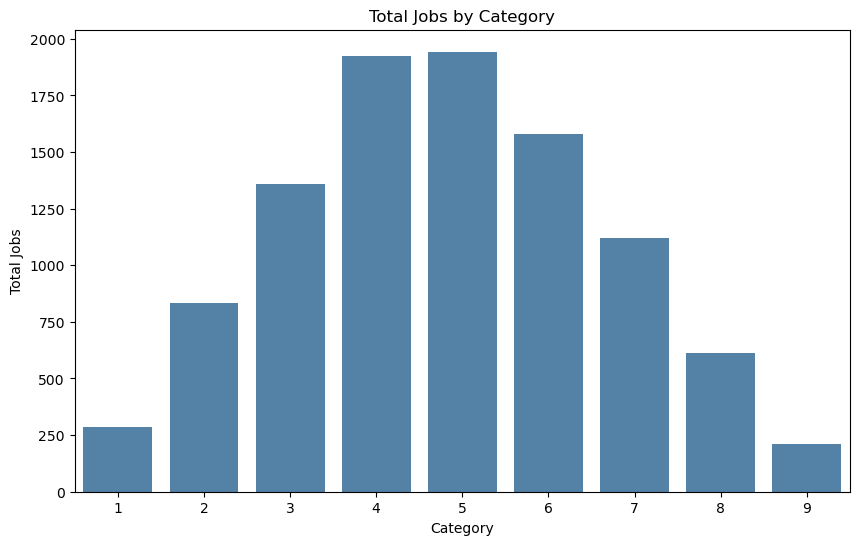

In [230]:
# 2. Verify required columns exist: category, accepted, number_of_impressions, estimated_size
required_cols = ['category', 'accepted', 'number_of_impressions', 'estimated_size']
for col in required_cols:
    if col not in df.columns:
        raise ValueError(f"Missing required column: {col}")

# 3. Convert 'accepted' and 'number_of_impressions' to numeric
df['accepted'] = pd.to_numeric(df['accepted'], errors='coerce')
df['number_of_impressions'] = pd.to_numeric(df['number_of_impressions'], errors='coerce')

# 4. Convert 'estimated_size' to numeric if needed
if df['estimated_size'].dtype == object:
    size_mapping = {'small': 1, 'medium': 2, 'large': 3}
    df['estimated_size_numeric'] = df['estimated_size'].str.lower().map(size_mapping)
else:
    df['estimated_size_numeric'] = pd.to_numeric(df['estimated_size'], errors='coerce')

# 5. Group by category and calculate overall statistics
category_stats = df.groupby('category').agg(
    total_jobs=('accepted', 'count'),
    acceptance_rate=('accepted', 'mean'),
    avg_impressions=('number_of_impressions', 'mean'),
    avg_job_size=('estimated_size_numeric', 'mean')
).reset_index()

print("Overall Statistics by Category:")
print(category_stats)

# 6. Optional: Visualize the results
plt.figure(figsize=(10, 6))
sns.barplot(data=category_stats, x='category', y='acceptance_rate', color='steelblue')
plt.title("Average Acceptance Rate by Category")
plt.xlabel("Category")
plt.ylabel("Acceptance Rate")
plt.ylim(0, 1)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=category_stats, x='category', y='total_jobs', color='steelblue')
plt.title("Total Jobs by Category")
plt.xlabel("Category")
plt.ylabel("Total Jobs")
plt.show()


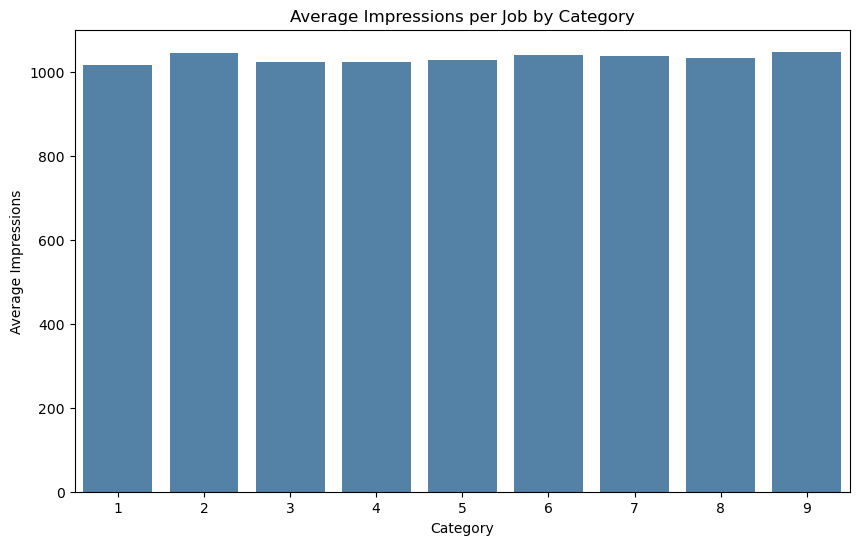

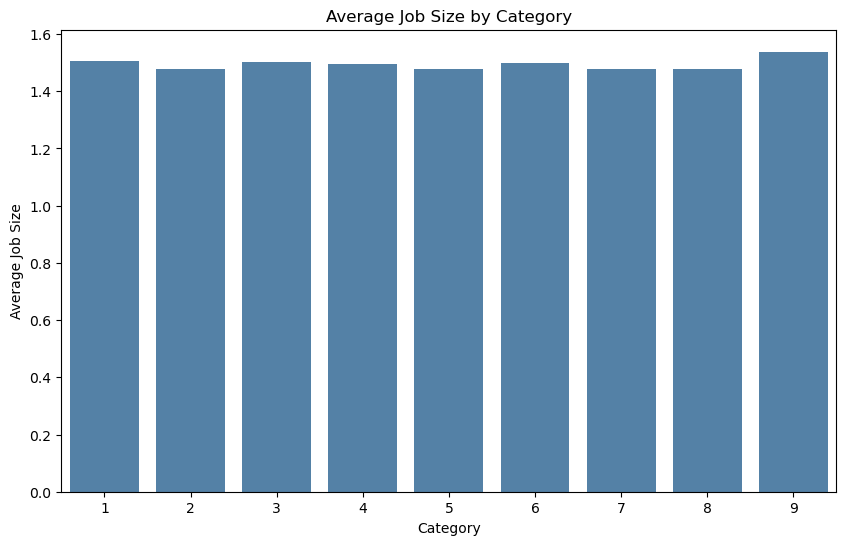

In [236]:
plt.figure(figsize=(10, 6))
sns.barplot(data=category_stats, x='category', y='avg_impressions', color='steelblue')
plt.title("Average Impressions per Job by Category")
plt.xlabel("Category")
plt.ylabel("Average Impressions")
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=category_stats, x='category', y='avg_job_size', color='steelblue')
plt.title("Average Job Size by Category")
plt.xlabel("Category")
plt.ylabel("Average Job Size")
plt.show()

In [246]:
import pandas as pd
import numpy as np
import math
from sklearn.cluster import DBSCAN
from scipy.stats import f_oneway
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------
# Step 1: Data Loading & Preparation
# ----------------------------
df = pd.read_csv("/Users/james.maulana/Projects/Hi Pages/data/hi_pages_clean.csv")

# Verify required columns exist
required_cols = ['latitude', 'longitude', 'accepted', 'number_of_impressions', 'estimated_size', 'category']
for col in required_cols:
    if col not in df.columns:
        raise ValueError(f"Missing required column: {col}")

# Drop rows with missing coordinates
df = df.dropna(subset=['latitude', 'longitude'])

# Convert 'accepted' and 'number_of_impressions' to numeric
df['accepted'] = pd.to_numeric(df['accepted'], errors='coerce')
df['number_of_impressions'] = pd.to_numeric(df['number_of_impressions'], errors='coerce')

# ----------------------------
# Step 2: Cluster Jobs by Geographic Coordinates using DBSCAN
# ----------------------------
coords = df[['latitude', 'longitude']].values
db = DBSCAN(eps=0.05, min_samples=10, metric='euclidean').fit(coords)
df['city_cluster'] = db.labels_  # -1 indicates noise

# Filter out noise points (optional)
clusters = df[df['city_cluster'] != -1].copy()

# ----------------------------
# Step 3: Calculate Cluster Metrics and Assign City Names
# ----------------------------
grouped = clusters.groupby('city_cluster').agg(
    job_count=('accepted', 'count'),
    acceptance_rate=('accepted', 'mean'),
    centroid_latitude=('latitude', 'mean'),
    centroid_longitude=('longitude', 'mean')
).reset_index()

# Define major Australian cities with approximate coordinates
australian_cities = {
    'Sydney': (-33.8688, 151.2093),
    'Melbourne': (-37.8136, 144.9631),
    'Brisbane': (-27.4698, 153.0251),
    'Perth': (-31.9505, 115.8605),
    'Adelaide': (-34.9285, 138.6007),
    'Canberra': (-35.2809, 149.1300),
    'Hobart': (-42.8821, 147.3272),
    'Darwin': (-12.4634, 130.8456)
}

def haversine(lat1, lon1, lat2, lon2):
    # Convert degrees to radians
    lon1, lat1, lon2, lat2 = map(math.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a))
    km = 6371 * c
    return km

def assign_city(centroid_lat, centroid_lon, cities):
    min_dist = float('inf')
    closest_city = None
    for city, (city_lat, city_lon) in cities.items():
        dist = haversine(centroid_lat, centroid_lon, city_lat, city_lon)
        if dist < min_dist:
            min_dist = dist
            closest_city = city
    return closest_city

grouped['city'] = grouped.apply(lambda row: assign_city(row['centroid_latitude'], row['centroid_longitude'], australian_cities), axis=1)
print("\nCluster metrics with assigned city names:")
print(grouped)

# Merge the city name back into the main DataFrame
df = df.merge(grouped[['city_cluster', 'city']], on='city_cluster', how='left')

# ----------------------------
# Step 4: Convert Estimated Job Size to Numeric
# ----------------------------
if df['estimated_size'].dtype == object:
    size_mapping = {'small': 1, 'medium': 2, 'large': 3}
    df['estimated_size_numeric'] = df['estimated_size'].str.lower().map(size_mapping)
else:
    df['estimated_size_numeric'] = pd.to_numeric(df['estimated_size'], errors='coerce')

# ----------------------------
# Step 5: Prepare Data for Logistic Regression
# ----------------------------
# Convert 'category' and 'city' to strings and fill missing values
df['category'] = df['category'].astype(str).fillna('Unknown')
df['city'] = df['city'].fillna('Unknown')

# Numeric features:
numeric_features = ['number_of_tradies', 'estimated_size_numeric', 'number_of_impressions']

# Create dummy variables for 'category' and 'city'
dummies_category = pd.get_dummies(df['category'], prefix='cat', drop_first=True)
dummies_city = pd.get_dummies(df['city'], prefix='city', drop_first=True)

# Combine all features
X = pd.concat([df[numeric_features], dummies_category, dummies_city], axis=1)

# Force all columns to be numeric
X = X.astype(float)

# Add a constant (intercept) term
X = sm.add_constant(X)

# Define the target variable
y = df['accepted']

# Check data types in X (should all be numeric)
print("Feature data types:")
print(X.dtypes)

# ----------------------------
# Step 6: Fit the Logistic Regression Model using Statsmodels
# ----------------------------
logit_model = sm.Logit(y, X)
result = logit_model.fit()
print(result.summary())

# ----------------------------
# Step 7: (Optional) T-Test Example
# ----------------------------
from scipy.stats import ttest_ind

accepted_jobs = df[df['accepted'] == 1]['number_of_tradies']
not_accepted_jobs = df[df['accepted'] == 0]['number_of_tradies']
stat, p_value = ttest_ind(accepted_jobs.dropna(), not_accepted_jobs.dropna(), equal_var=False)
print(f"\nT-test for number_of_tradies: p-value={p_value}")



Cluster metrics with assigned city names:
   city_cluster  job_count  acceptance_rate  centroid_latitude  \
0             0       4422         0.272275         -37.812006   
1             1       4772         0.247695         -33.872145   
2             2        609         0.339901         -17.963800   

   centroid_longitude       city  
0          144.959031  Melbourne  
1          151.209549     Sydney  
2          122.233999     Darwin  
Feature data types:
const                     float64
number_of_tradies         float64
estimated_size_numeric    float64
number_of_impressions     float64
cat_2                     float64
cat_3                     float64
cat_4                     float64
cat_5                     float64
cat_6                     float64
cat_7                     float64
cat_8                     float64
cat_9                     float64
city_Melbourne            float64
city_Sydney               float64
city_Unknown              float64
dtype: object
Optimiza